In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, ClassicalRegister, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

# additional packages needed
import time

# to run on IBM computer
from qiskit.tools.monitor import job_monitor
from qiskit.providers.ibmq import least_busy
from qiskit.tools import backend_monitor

# import matplot lib
import matplotlib as plt

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Notes about the paper
The discrete Quantum Random Walk (QRW) is considered. The algorithm contains a walker, a coin, and evolution operators. Measurement is only performed at the end.

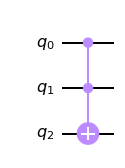

In [2]:
## The Toffoli gate
qcT = QuantumCircuit(3)
a = 0
b = 1
t = 2
# Toffoli with control qubits a and b and target t
qcT.ccx(a,b,t)
qcT.draw()

## The 5 position state qubits
The circuits below give the coin and shift operators for the QRW. This can be done purely with CNOT and Toffoli  gates.

In [3]:
## Coin and shift operator for walking on the number line with five-position states (Figure 4)

qc = QuantumCircuit(8, 5)
# label the qubits
q0 = 0
q1 = 1
q2 = 2
c0 = 3
q3 = 4
c1 = 5
q4 = 6
c = 7

# set the initial states |01111>
qc.x(q1)
qc.x(q2)
qc.x(q3)
qc.x(q4)
    
# the start of a step
def step5(steps):
    for i in range(steps):
        qc.h(c)
        qc.cx(c, q0)
        qc.cx(c, q1)
        qc.cx(c, q2)
        qc.cx(c, q3)
        qc.cx(c, q4)

        # this part can be replaced by the MCT gate
        qc.ccx(q0, q1, c0)
        qc.ccx(q2, c0, c1)
        qc.ccx(q3, c1, q4)
        qc.ccx(q2, c0, c1)
        qc.ccx(q2, c0, q3)
        # end of the part that can be replaced by the MCT gate

        qc.ccx(q0, q1, c0)
        qc.ccx(q0, q1, q2)
        qc.cx(q0, q1)
        qc.x(q0)
        qc.cx(c, q0)
        qc.cx(c, q1)
        qc.cx(c, q2)
        qc.cx(c, q3)
        qc.cx(c, q4)
        # end of step

    qc.measure([q0, q1, q2, q3, q4], [0, 1, 2, 3, 4])

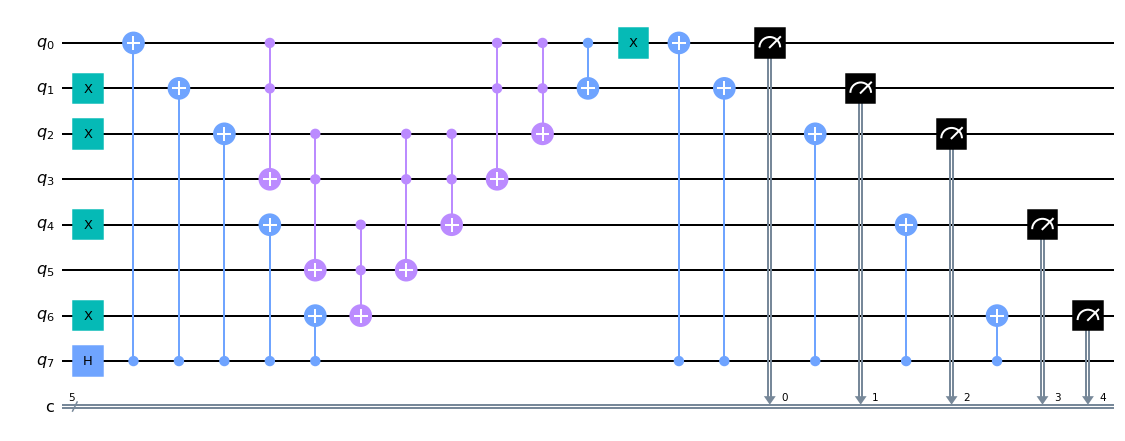

In [4]:
# example of one step circuit
step5(1)
qc.draw()

In [5]:
# the circuit depth of one step without measurement
qc.depth()

19

The code below repeats the coin and shift operator for a single step 13 times and simulates the counts using the aer simulator the results can be seen in the histogram below. The circuit depth is now $18 \times 13 + 1 = 235$ which agrees with the corresponding result from the paper. The additional 1 comes from the measurement at the end of the QRW. Additionally the NOT gates used at the beginning to initial the qubits do not add to circuit depth since they are on the same level as the H gate.

In [6]:
qc = QuantumCircuit(8, 5)
# label the qubits
q0 = 0
q1 = 1
q2 = 2
c0 = 3
q3 = 4
c1 = 5
q4 = 6
c = 7

# set the initial states |01111>
qc.x(q1)
qc.x(q2)
qc.x(q3)
qc.x(q4)

step5(13)

In [ ]:
# this is the circuit depth from the paper
qc.depth()

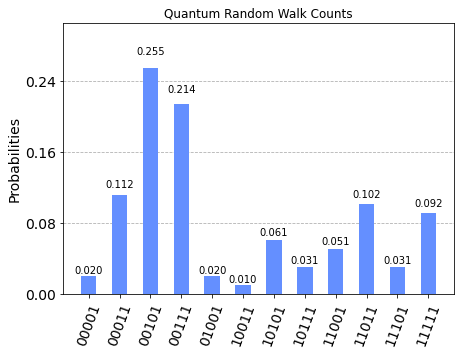

In [7]:
# get the start time
st = time.time()

simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
# set measurement repition to 100 million
result = simulator.run(qc, shots = 100^6).result()
counts = result.get_counts(qc)

# get the end time
et = time.time()

plot_histogram(counts, title='Quantum Random Walk Counts')

In [ ]:
# get the computing wall time here
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

### Try walking a different number of steps

In [8]:
qc = QuantumCircuit(8, 5)
# label the qubits
q0 = 0
q1 = 1
q2 = 2
c0 = 3
q3 = 4
c1 = 5
q4 = 6
c = 7

# set the initial states |01111>
qc.x(q1)
qc.x(q2)
qc.x(q3)
qc.x(q4)

step5(10)

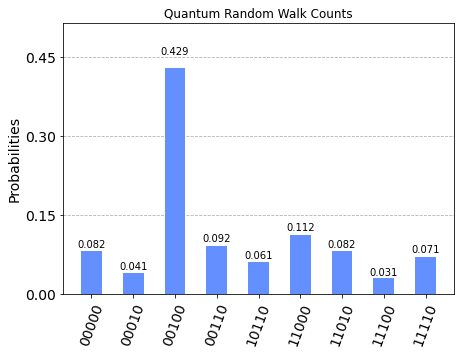

In [9]:
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
# set measurement repition to 100 million
result = simulator.run(qc, shots = 100^6).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

### Try different initial conditions

In [28]:
## Add code to try different initial conditions
qc = QuantumCircuit(8, 5)
# label the qubits
q0 = 0
q1 = 1
q2 = 2
c0 = 3
q3 = 4
c1 = 5
q4 = 6
c = 7

# set the initial states |01111>
qc.x(q3)
qc.x(q4)

step5(13)

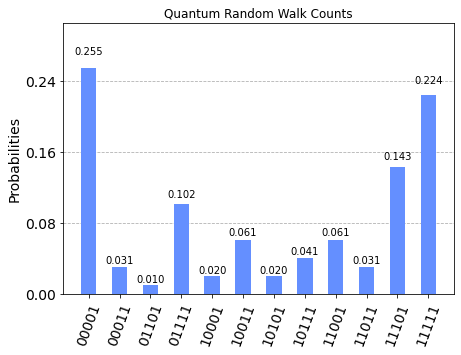

In [29]:
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
# set measurement repition to 100 million
result = simulator.run(qc, shots = 100^6).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

In [39]:
## Add code to try different initial conditions
qc = QuantumCircuit(8, 5)
# label the qubits
q0 = 0
q1 = 1
q2 = 2
c0 = 3
q3 = 4
c1 = 5
q4 = 6
c = 7

# set the initial states |01111>
qc.x(q3)
qc.x(q4)

step5(12)

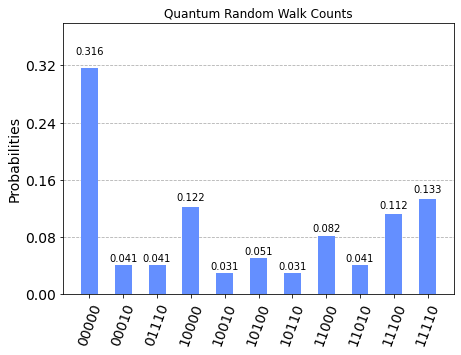

In [40]:
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
# set measurement repition to 100 million
result = simulator.run(qc, shots = 100^6).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

## The circuit to implement on the actual IBM computer
This is the circuit that was implemented on the quantum computer after it was tested on the simulator. This circuit only has 2 position state qubits and requires only 3 qubits total. The number line range is between -1 and 2 and the maximum walking steps taken was 1. The position qubits $|q_0>$ and $|q_1>$ are initialized to $|01>$ and the coin is initialized to $|0>$.

### Testing on the simulator

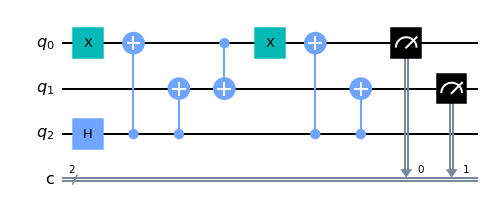

In [31]:
# this is probably not right
# this is probably not right
qc = QuantumCircuit(3, 2)
q0 = 0
q1 = 1
c = 2

# set initial state of this qubit
qc.x(q0)

qc.h(c)
qc.cx(c, q0)
qc.cx(c, q1)
qc.cx(q0, q1)
qc.x(q0)
qc.cx(c, q0)
qc.cx(c, q1)
qc.measure([q0, q1], [0, 1])

qc.draw()

In [32]:
# find the circuit depth
qc.depth()

8

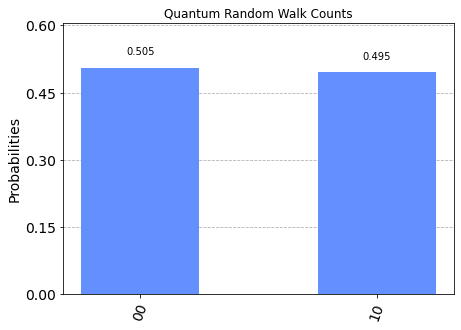

In [33]:
# this is the results from the paper
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
result = simulator.run(qc).result()
counts = result.get_counts(qc)
plot_histogram(counts, title='Quantum Random Walk Counts')

This result shows that the random walk takes a step either left or right and that there is about a 50% change of the walker going in either direction. This is the random walk algorithm results that is expected.

### IBM computer

In [12]:
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends(simulator=False)

[<IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>]

Job Status: job has successfully run


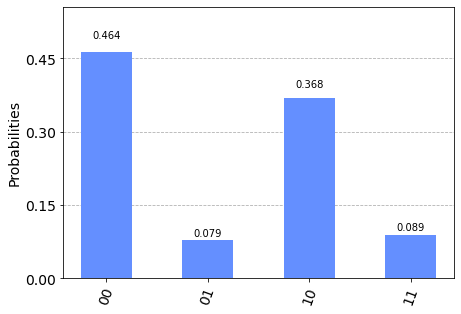

In [13]:
candidates = provider.backends(filters=lambda x: x.configuration().n_qubits >= 3
                                   and not x.configuration().simulator)
backend = least_busy(candidates)
job = execute(qc, backend, shots=2000)
job_monitor(job)
device_result = job.result()
plot_histogram(job.result().get_counts())

In [ ]:
backend_monitor(backend)

The results are the same as on the simulator except that around 8% of the walk trials end of in parts of the number line that are classical not allowed. The 11 state adn 01 state. The 01 state is the starting walk so the particle should take a step to the left or right of this and the 11 state is beyond one step away from the starting position. This is due to errors in the IBM hardware.

### Try 2 walks on the same circuit
The code below attempts to implement the same quantum circuit above but with 2 steps. This goes beyond the results of the paper.

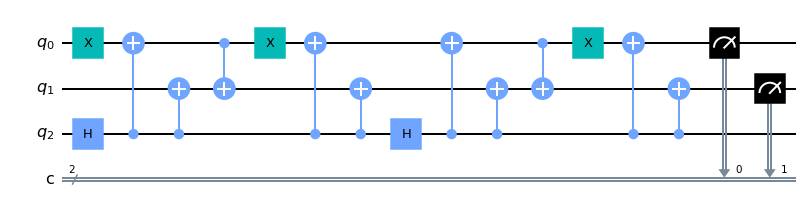

In [14]:
# figure out what the qubit limit is one the IBM computers that I have access to
# and then be done with this part of the project
qc = QuantumCircuit(3, 2)
q0 = 0
q1 = 1
c = 2

# set initial state of this qubit
qc.x(q0)

for i in range(2):
# start of the QRW circuit
    qc.h(c)
    qc.cx(c, q0)
    qc.cx(c, q1)
    qc.cx(q0, q1)
    qc.x(q0)
    qc.cx(c, q0)
    qc.cx(c, q1)
# end of single step

# measurement
qc.measure([q0, q1], [0, 1])
qc.draw()

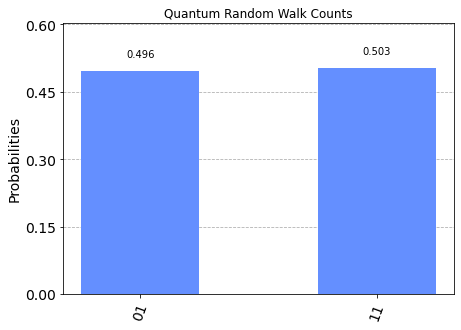

In [15]:
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
result = simulator.run(qc, shots = 2000).result()
counts = result.get_counts(qc)
plot_histogram(counts, title='Quantum Random Walk Counts')

## Try larger position state qubits IBM computer
The Armonk computer is 53 qubits and should be able to handle the larger random walk circuit.
This was not done in the paper but I'll see if I can do it.

In [47]:
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends(simulator=False)

[<IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [48]:
# max qubits we have is 5 build 5 qubits QRW
candidates = provider.backends(filters=lambda x: x.configuration().n_qubits >= 5
                                   and not x.configuration().simulator)
candidates

[<IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [49]:
# code for 3 position QRW algorithm which should only need 1 ancilla qubit and 1 coin so 5 total
# we should be able to run on IBM computer
qc = QuantumCircuit(4, 3)
# label the qubits
q0 = 0
q1 = 1
q2 = 2
c = 3

# the initial state listed on the histogram as |110>
qc.x(q1)
qc.x(q2)

# the start of a step
def step3(steps):
    for i in range(steps):
        qc.h(c)
        qc.cx(c, q0)
        qc.cx(c, q1)
        qc.cx(c, q2)

        qc.ccx(q0, q1, q2)
        qc.cx(q0, q1)
        qc.x(q0)
        qc.cx(c, q0)
        qc.cx(c, q1)
        qc.cx(c, q2)
        # end of step

    qc.measure([q0, q1, q2], [0, 1, 2])

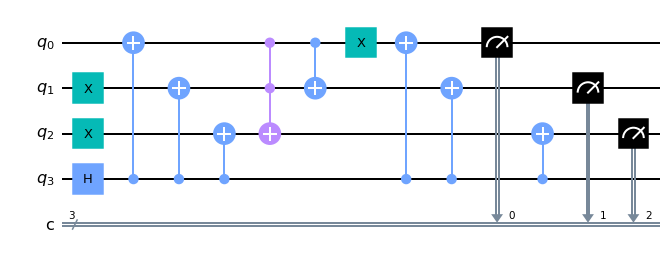

In [50]:
step3(1)
qc.draw()

In [51]:
# test this algorithm for use on the qunatum computer
qc = QuantumCircuit(4, 3)
# label the qubits
q0 = 0
q1 = 1
q2 = 2
c = 3

# the initial state listed on the histogram as |110>
qc.x(q1)
qc.x(q2)

step3(4)

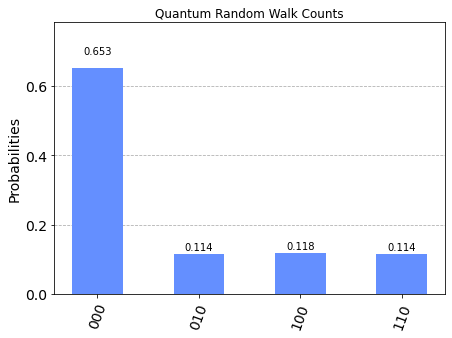

In [52]:
simulator = Aer.get_backend('aer_simulator')

qc = transpile(qc, simulator)

# Run and get counts
# set measurement repition to 100 million
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts(qc)

plot_histogram(counts, title='Quantum Random Walk Counts')

Job Status: job has successfully run


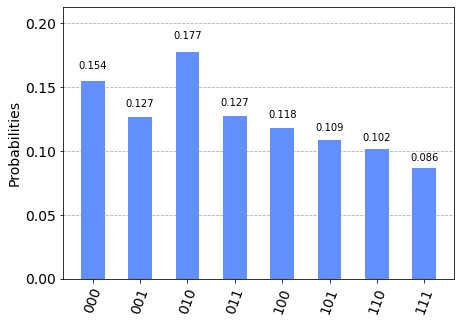

In [53]:
# run on the quantum computer
backend = backend = least_busy(candidates)
job = execute(qc, backend, shots=2000)
job_monitor(job)
device_result = job.result()
plot_histogram(job.result().get_counts())

In [ ]:
backend_monitor(backend)

NEXT STEPS:
Try end of the number as intital condition
Try experimenting with H gate placement like in the circular QRW.
Switch the measurement qubits
Try to minimize error for 3 position